# Exemplo de separação regional residual utilizando um ajuste polinomial robusto (Beltrão et al., 1998)

* Beltrão, J. F., Silva, J. B. C., and Costa, J. C. Robust polynomial fitting method for regional gravity estimation
    GEOPHYSICS, 56(1), 80-89. [doi: 10.1190/1.1442960](http://dx.doi.org/10.1190/1.1442960)

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
import pandas as pd
import matplotlib as mpb

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Importing Diorama TFA data

In [2]:
dataset = pd.read_csv('../anitapolis_large_decimated.txt', skipinitialspace=True, delim_whitespace=True)

In [3]:
xp = dataset['X'].get_values()
yp = dataset['Y'].get_values()
lat = dataset['LAT'].get_values()
long = dataset['LONG'].get_values()
zp = - dataset['GPSALT'].get_values()
dobs = dataset['MAGIGRF'].get_values()

### Pontos onde são calculados os dados

In [4]:
#shape = (100, 100) # número de pontos ao longo de x e y
N = xp.size # número de pontos
#area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
#xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

#xc = 0.5*(area[1] + area[0]) # coordenadas x do centro da área
#yc = 0.5*(area[3] + area[2]) # coordenadas y do centro da área

### Plot dos dados

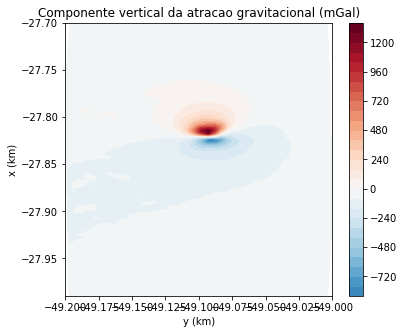

In [5]:
plt.figure(figsize=(6,5))

plt.subplot(1,1,1)
plt.title("Componente vertical da atracao gravitacional (mGal)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(long, lat, dobs, 30, cmap ='RdBu_r', norm=norm)
plt.colorbar()
#plt.plot(yp, xp, 'ok', markersize=0.5)
plt.xlabel('y (km)')
plt.ylabel('x (km)')
#mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

### Ajuste polinomial simples

In [6]:
A = np.vstack((np.ones(N), xp, yp)).T

In [7]:
p1 = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,dobs))

In [8]:
tfa_regional1 = np.dot(A,p1)

In [8]:
p1

array([-3.49360114e+03,  4.21195233e-04,  7.74646285e-04])

In [9]:
tfa_residual1 = dobs - tfa_regional1

In [10]:
np.max(tfa_regional1)

-33.08069368534946

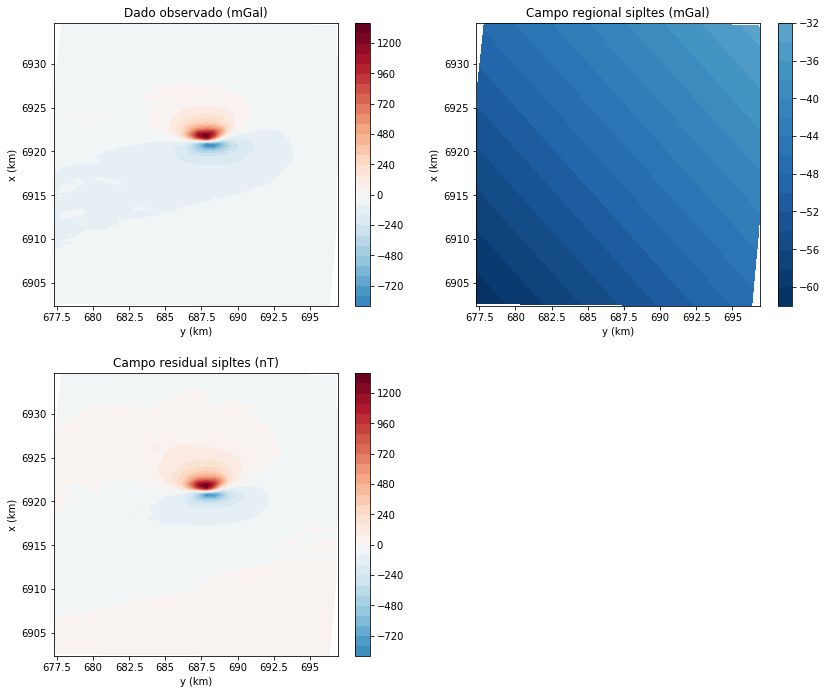

In [11]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Dado observado (mGal)")
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 30, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Campo regional sipltes (mGal)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=np.min(tfa_regional1), vmax=-np.min(tfa_regional1))
plt.tricontourf(yp, xp, tfa_regional1, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Campo residual sipltes (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(tfa_residual1), vmax=np.max(tfa_residual1))
plt.tricontourf(yp, xp, tfa_residual1, 30, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

# plt.subplot(2,2,4)
# plt.title("Campo esfera (nT)")
# #plt.axis('scaled')
# plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'))
# plt.colorbar()
# plt.xlabel('y (km)')
# plt.ylabel('x (km)')
# mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

In [12]:
np.max(dobs)

1305.617

In [13]:
np.max(tfa_residual1)

1350.9436344934343

In [14]:
tfa_residual1.size

10761

### Ajuste polinomial robusto

In [15]:
iteracoes = 30

p2 = p1.copy()
tfa_regional2 = tfa_regional1.copy()

for i in range(iteracoes):
    r = dobs - tfa_regional2
    s = np.median(r)
    W = np.diag(np.exp(-((0.6745*r/s)**2.)))
    W = np.diag(1./np.abs(r + 1.e-10))
    W = np.dot(A.T,W)
    p2 = np.linalg.solve(np.dot(W,A), np.dot(W,dobs))
    tfa_regional2 = np.dot(A, p2)

In [16]:
tfa_residual2 = dobs - tfa_regional2

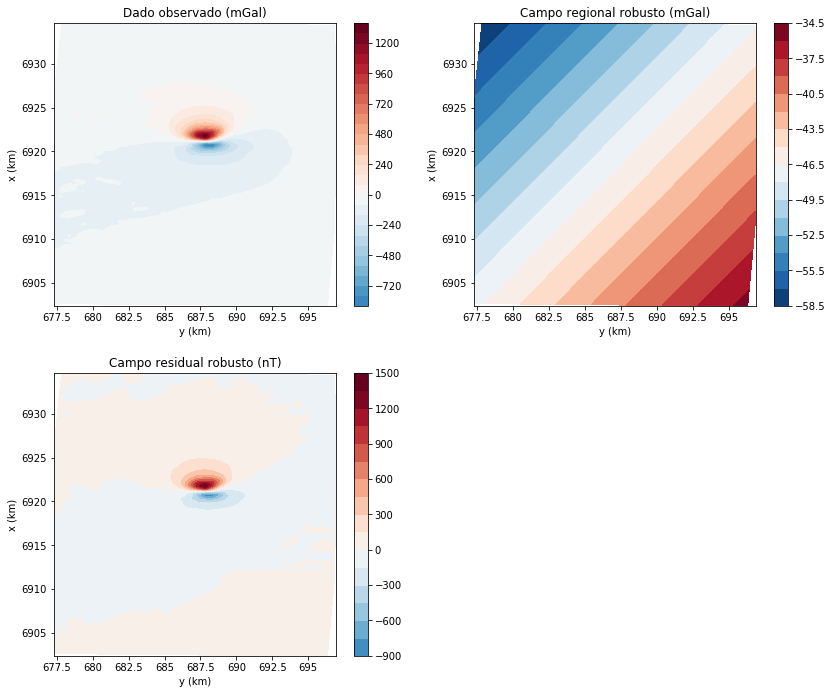

In [17]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Dado observado (mGal)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, dobs, 30, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Campo regional robusto (mGal)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, tfa_regional2, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Campo residual robusto (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(tfa_residual2), vmax=np.max(tfa_residual2))
plt.tricontourf(yp, xp, tfa_residual2, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

# plt.subplot(2,2,4)
# plt.title("Campo esfera (nT)")
# plt.axis('scaled')
# plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'))
# plt.colorbar()
# plt.xlabel('y (km)')
# plt.ylabel('x (km)')
# mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

In [19]:
dataset.insert(3, "mag_res1", tfa_residual1)
dataset.insert(4, "mag_res2", tfa_residual2)

In [21]:
dataset.to_csv('anitapolis_decimated_tfa_residual.txt', sep=' ')